In [13]:
import time
import azure.cognitiveservices.speech as speechsdk
import numpy as np

## 语音合成
### 设置语音合成参数

In [14]:
# 设置语音合成参数
# 这个是你自己在azure网站上对应的资源 秘钥 和 region设定,保持一致
speech_config = speechsdk.SpeechConfig(subscription="2f22ac9097ae424bb8c61310328abc43", region="eastus")
'''
SpeechSynthesisOutputFormat Enum  没有wav格式吗
在 Web Speech API 中，SpeechSynthesisOutputFormat 枚举并不支持直接生成 WAV 格式的语音输出。但是，可以使用其他格式，例如 MP3、OGG 或 PCM 等，然后将其转换为 WAV 格式。

要使用 Web Speech API 将文本转换为其他格式的语音，您需要首先实例化 SpeechSynthesisUtterance 对象，然后将其传递给 SpeechSynthesis.speak() 方法。您可以在 SpeechSynthesisUtterance 对象上设置不同的属性，以自定义语音输出，例如语音速度、音量、语音语言等。

在 SpeechSynthesisUtterance 对象上，您可以使用 SpeechSynthesisAudioDestinationNode 接口来将语音输出到 PCM 或其他格式。然后，您可以使用音频处理库（例如 ffmpeg）将 PCM 转换为 WAV 格式。
'''
speech_config.set_speech_synthesis_output_format(speechsdk.SpeechSynthesisOutputFormat.Audio48Khz192KBitRateMonoMp3
)
#这两个可以不要了,在SSML中设置,留个秘钥就行了.
#speech_config.speech_synthesis_language = "zh-CN"
# speech_config.speech_synthesis_voice_name ="zh-CN-XiaomoNeural"

# 生成的时候是否发声,方便测试的.
audio_config = speechsdk.audio.AudioOutputConfig(use_default_speaker=True)
# 如果要听声音
# synthesizer = speechsdk.SpeechSynthesizer(speech_config=speech_config, audio_config=audio_config)
# 如果不想听声音
synthesizer = speechsdk.SpeechSynthesizer(speech_config=speech_config, audio_config=None)

### 单个音节的生成


In [20]:
'''
单个音节文件的生成
'''
#注意 SSML的优先级更高。
ssml_string = open("RSA.xml", "r").read()
result = synthesizer.speak_ssml_async(ssml_string).get()

stream = speechsdk.AudioDataStream(result)
stream.save_to_wav_file("ji1.wav")


#### 修改成想要的音节

In [23]:

'''
单个修改音节
修改xml文件,生成对应的音节.


这里之前采用过直接写string,但是发现问题很多,不如读 xml为string,再来定位修改关键参数.
'''

string = ssml_string
print(string)
keyword = "ph=\""
replacement = "ba 1"
# 查询关键字并替换
if keyword in string:
    index = string.index(keyword) + len(keyword)
    if string[index:index+4] == 'pa 1':
        string = string[:index] + replacement + string[index+4:]
print(string)

result = synthesizer.speak_ssml_async(string)
speechsdk.AudioDataStream(result)

Exception ignored in: <function AudioDataStream.__del__ at 0x0000021A3767A0D0>
Traceback (most recent call last):
  File "C:\Users\SilverBullet\AppData\Roaming\Python\Python39\site-packages\azure\cognitiveservices\speech\speech.py", line 1993, in __del__
    self.detach_input()
  File "C:\Users\SilverBullet\AppData\Roaming\Python\Python39\site-packages\azure\cognitiveservices\speech\speech.py", line 2094, in detach_input
    _call_hr_fn(fn=_sdk_lib.audio_data_stream_detach_input, *[self._handle])
  File "C:\Users\SilverBullet\AppData\Roaming\Python\Python39\site-packages\azure\cognitiveservices\speech\speech.py", line 1990, in _handle
    return self.__handle.get()
AttributeError: 'AudioDataStream' object has no attribute '_AudioDataStream__handle'
Exception ignored in: <function AudioDataStream.__del__ at 0x0000021A3767A0D0>
Traceback (most recent call last):
  File "C:\Users\SilverBullet\AppData\Roaming\Python\Python39\site-packages\azure\cognitiveservices\speech\speech.py", line 199

<speak xmlns="http://www.w3.org/2001/10/synthesis"  version="1.0" xml:lang="zh-CN">
  <voice name="zh-CN-XiaoxuanNeural">
    <prosody rate="0%" pitch="0%" volume="+500%">
      <phoneme alphabet="sapi" ph="pa 1"></phoneme>
    </prosody>
  </voice>
</speak>


<speak xmlns="http://www.w3.org/2001/10/synthesis"  version="1.0" xml:lang="zh-CN">
  <voice name="zh-CN-XiaoxuanNeural">
    <prosody rate="0%" pitch="0%" volume="+500%">
      <phoneme alphabet="sapi" ph="ba 1"></phoneme>
    </prosody>
  </voice>
</speak>




ValueError: result must be a SpeechSynthesisResult or KeywordRecognitionResult, is "<azure.cognitiveservices.speech.ResultFuture object at 0x0000021A4970C0D0>"

#### 函数版本

In [24]:
'''
改成函数  修改音节函数
'''
import os
current_filePath = 'E:\实验\阅读困难\刺激信号\RSA'
os.chdir(current_filePath)

def changeXML(string, keyword, replacement,):
    # 查询关键字并替换
    if keyword in string:
        index = string.index(keyword) + len(keyword)
        # 因为源文件里放的是'pa 1',有空格是因为azure的语法要求,只能带有..
        if string[index:index + 4] == 'pa 1':
            string = string[:index] + replacement + string[index + 4:]
    return string

ssml_string = open("RSA.xml", "r").read()
string = changeXML(string=ssml_string,keyword="ph=\"",replacement = "ba 1")
synthesizer.speak_ssml_async(string)

### 多个音节生成
包括写出去中间结果.

In [25]:
'''
考虑生成多个文件,那就需要改变ssml_string中的值了.
'''
import time
import random
import os
#先读进来一个模版,因为直接写会报错
ssml_string = open("RSA.xml", "r").read()

list_yinjie = [
    'ba 1', 'ba 2', 'ba 3', 'ba 4',
    'pa 1', 'pa 2', 'pa 3', 'pa 4',
    'da 1', 'da 2', 'da 3', 'da 4',
    'ta 1', 'ta 2', 'ta 3', 'ta 4',
    'ji 1', 'ji 4'
]
# list_yinjie = [
#     'ba 1',
# ]
#查询ssml_string中对应的关键字,完成替换,比如查找'ph='开始的九个字符,
Path_save = '声音刺激_未加工'
# gpt:更改当前目录到子目录
os.chdir(Path_save)
for yinjie in list_yinjie:
    XMLstring = changeXML(string=ssml_string,keyword="ph=\"",replacement = yinjie)
    #写出去
    result = synthesizer.speak_ssml_async(XMLstring).get()
    stream = speechsdk.AudioDataStream(result)
    # 和音节名称保持一致,实际上不大好,这样子中间会有一个空格,比如pa 1.
    # .mp3不是高保证文件,而且psychopy的builder不支持.mp3,最好用.wav;这就要求一开始的编码config设置就是wav对应的格式了.
    name_yinjie = yinjie.replace(" ", "")
    folder_path = '声音刺激_未加工'

    stream.save_to_wav_file(name_yinjie +".mp3")
# 返回到上一级目录
os.chdir("..")

### 音频切割_单个音节
想要去掉silent,'可可可以'师姐的方法需要耗费人力去标注,去听,你想试试机器的方法能否做到.


In [ ]:
'''
gpt问题:
如何截取声音文件的有效部分 去掉静音的部分

https://github.com/jiaaro/pydub/blob/master/API.markdown
API文档

'''
from pydub import AudioSegment
from pydub.silence import split_on_silence

# 设置关键参数,保持统一
silence_thresh = -50
# 对应的文件名

# 读取声音文件
sound = AudioSegment.from_mp3("pa1.mp3")

# 使用silence.split_on_silence()方法切割静音部分
chunks = split_on_silence(sound,
                          # silence_len: 静默段的长度阈值，小于该值的静默段将被忽略，默认是1000ms
                          # silence_thresh: 静默段的阈值（dBFS），小于该值的声音段将被视为静默，默认是-16dBFS
                          min_silence_len=50,
                          silence_thresh=silence_thresh,
                          keep_silence=False
                          )

print(chunks[0].duration_seconds)

# 取出每个非静音部分
non_silent_chunks = [chunk for chunk in chunks if len(chunk) > 0]

# 拼接所有的非静音部分
result = non_silent_chunks[0]

for chunk in non_silent_chunks[1:]:
    result += chunk
# silence_thresh 和前面的split保持一致.
result = result.strip_silence(silence_len = 1, padding=0, silence_thresh=silence_thresh)

print(result.duration_seconds)
# 输出结果
# 必须是.wav,.MP3是会失真的.
result.export("pa1_noSilent.wav", format="wav", )

#### 改成函数

In [29]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

def split_mp3(current_filePath, name_read, silence_thresh):

    os.chdir(current_filePath)
    # 读取声音文件
    sound = AudioSegment.from_mp3(name_read)
    # 使用silence.split_on_silence()方法切割静音部分
    chunks = split_on_silence(sound,
                              # silence_len: 静默段的长度阈值，小于该值的静默段将被忽略，默认是1000ms
                              # silence_thresh: 静默段的阈值（dBFS），小于该值的声音段将被视为静默，默认是-16dBFS
                              min_silence_len=50,
                              silence_thresh=silence_thresh,
                              keep_silence=False
                              )



    # 取出每个非静音部分
    non_silent_chunks = [chunk for chunk in chunks if len(chunk) > 0]

    # 拼接所有的非静音部分
    result = non_silent_chunks[0]

    for chunk in non_silent_chunks[1:]:
        result += chunk
    # silence_thresh 和前面的split保持一致.
    # result = result.strip_silence(silence_len = 1, padding=0, silence_thresh=silence_thresh)#感觉没啥影响了.前面那个函数已经包含了掐头去尾的功能.keep_silence=False
    # 在放到auditon中进行duration控制之前都记录一下时长.
    print(name_read)
    # print(chunks[0].duration_seconds)#和 result是一样的.
    print(result.duration_seconds)
    # 输出结果
    name_save = list_yinjie[i]+'.wav'
    result.export(name_save, format="wav", )

    # 可以用返回值来构造list?
    return  result

# 修改当前文件路径到音频所在的文件夹,因为AudioSegment函数不具有跳转文件夹功能.
current_filePath = 'E:\实验\阅读困难\刺激信号\RSA\声音刺激_未加工'
os.chdir(current_filePath)
list_yinjie = [
    'ba1', 'ba2', 'ba3', 'ba4',
    'pa1', 'pa2', 'pa3', 'pa4',
    'da1', 'da2', 'da3', 'da4',
    'ta1', 'ta2', 'ta3', 'ta4',
]
# 每个音频文件 增加.mp3后缀
list_mp3 = [item + '.mp3' for item in list_yinjie]
i = 0
name_read = list_mp3[i]
# 设置关键参数,保持统一
silence_thresh = -50
mp3File = split_mp3(current_filePath=current_filePath, name_read=name_read, silence_thresh=silence_thresh)



CouldntDecodeError: Decoding failed. ffmpeg returned error code: 1

Output from ffmpeg/avlib:

ffmpeg version 5.1.2 Copyright (c) 2000-2022 the FFmpeg developers
  built with clang version 15.0.7
  configuration: --prefix=/d/bld/ffmpeg_1674566436592/_h_env/Library --cc=clang.exe --cxx=clang++.exe --nm=llvm-nm --ar=llvm-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --ld=lld-link --target-os=win64 --enable-cross-compile --toolchain=msvc --host-cc=clang.exe --extra-libs=ucrt.lib --extra-libs=vcruntime.lib --extra-libs=oldnames.lib --strip=llvm-strip --disable-stripping --host-extralibs= --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libopus --pkg-config=/d/bld/ffmpeg_1674566436592/_build_env/Library/bin/pkg-config
  libavutil      57. 28.100 / 57. 28.100
  libavcodec     59. 37.100 / 59. 37.100
  libavformat    59. 27.100 / 59. 27.100
  libavdevice    59.  7.100 / 59.  7.100
  libavfilter     8. 44.100 /  8. 44.100
  libswscale      6.  7.100 /  6.  7.100
  libswresample   4.  7.100 /  4.  7.100
  libpostproc    56.  6.100 / 56.  6.100
[mp3 @ 00000201EF6BD6C0] Failed to read frame size: Could not seek to 1026.
ba1.mp3: Invalid argument


#### 批处理

In [28]:
# 循环调用上面的函数 实现批量生成音频文件.
# 修改当前文件路径到音频所在的文件夹,因为AudioSegment函数不具有跳转文件夹功能.
current_filePath = 'E:\实验\阅读困难\刺激信号\RSA\声音刺激_未加工'
os.chdir(current_filePath)
list_yinjie = [
    'ba1', 'ba2', 'ba3', 'ba4',
    'pa1', 'pa2', 'pa3', 'pa4',
    'da1', 'da2', 'da3', 'da4',
    'ta1', 'ta2', 'ta3', 'ta4',


]
# 每个音频文件 增加.mp3后缀
list_mp3 = [item + '.mp3' for item in list_yinjie]

# 设置关键参数,保持统一
silence_thresh = -50
list_duration = list()

for i in range(len(list_mp3)):
    name_read = list_mp3[i]
    mp3File = split_mp3(current_filePath=current_filePath, name_read=name_read, silence_thresh=silence_thresh)
    list_duration.append(mp3File.duration_seconds)


CouldntDecodeError: Decoding failed. ffmpeg returned error code: 1

Output from ffmpeg/avlib:

ffmpeg version 5.1.2 Copyright (c) 2000-2022 the FFmpeg developers
  built with clang version 15.0.7
  configuration: --prefix=/d/bld/ffmpeg_1674566436592/_h_env/Library --cc=clang.exe --cxx=clang++.exe --nm=llvm-nm --ar=llvm-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --ld=lld-link --target-os=win64 --enable-cross-compile --toolchain=msvc --host-cc=clang.exe --extra-libs=ucrt.lib --extra-libs=vcruntime.lib --extra-libs=oldnames.lib --strip=llvm-strip --disable-stripping --host-extralibs= --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libopus --pkg-config=/d/bld/ffmpeg_1674566436592/_build_env/Library/bin/pkg-config
  libavutil      57. 28.100 / 57. 28.100
  libavcodec     59. 37.100 / 59. 37.100
  libavformat    59. 27.100 / 59. 27.100
  libavdevice    59.  7.100 / 59.  7.100
  libavfilter     8. 44.100 /  8. 44.100
  libswscale      6.  7.100 /  6.  7.100
  libswresample   4.  7.100 /  4.  7.100
  libpostproc    56.  6.100 / 56.  6.100
[mp3 @ 0000018984ABBA00] Failed to read frame size: Could not seek to 1026.
ba1.mp3: Invalid argument


In [11]:
'''
算一下平均duration
'''
import numpy as np
np.average(list_duration)

0.19493749999999999

#### 检查一下前面的silence的尾部在哪里?

结果发现,确实是0,那么就是已经清除干净了吧.

#### 作图查看一下波形

In [17]:
import matplotlib.pyplot as plt
import IPython.display as ipd
# 需要转化为ndarray 才能和别的包互通
nd_res = result.get_array_of_samples()
plt.plot(nd_res)

AttributeError: 'SpeechSynthesisResult' object has no attribute 'get_array_of_samples'

#### 把之前处理好导出的文件重新导入对比

看看silence到底在不在了?
因为放到第三方软件中 并不为0

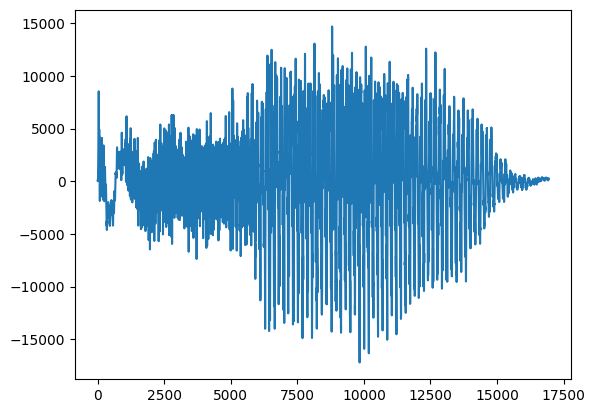

In [119]:
'''
把处理过 导出的声音 再堵回来看看波形.
'''
sound_post = AudioSegment.from_mp3("pa1_noSilent.wav")
nd_sound_post = sound_post.get_array_of_samples()
plt.plot(nd_sound_post)


#### 测试


[]
0


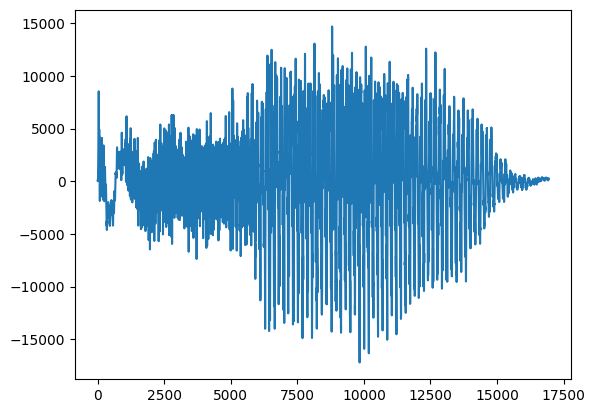

In [116]:

from pydub import AudioSegment, silence

plt.plot(result.get_array_of_samples())

print(silence.detect_silence(result, silence_thresh= silence_thresh, min_silence_len=30, seek_step=2))

print(silence.detect_leading_silence(result, silence_threshold=silence_thresh, chunk_size=2))



### 考虑设定时长

实在不行就交给audition好了.




## 切割超哥的音频

In [11]:
'''

读取文件切割就可以吧.
改一下单个的 切割 代码.

'''
from pydub import AudioSegment
from pydub.silence import split_on_silence
import os
import numpy as np

list_duration_chaoge = []
list_yinjie_chaoge = [
    'ba1', 'ba2', 'ba3', 'ba4',
    'pa1', 'pa2', 'pa3', 'pa4',
    'da1', 'da2', 'da3', 'da4',
    'ta1', 'ta2', 'ta3', 'ta4',
    'ga1', 'ga2', 'ga3', 'ga4',
    'ka1', 'ka2', 'ka3', 'ka4',
]

# 更改当前位置
current_filePath = 'E:\实验\阅读困难\刺激信号\RSA\声音刺激_未加工\chaoge'
os.chdir(current_filePath)
# 读取声音文件
sound = AudioSegment.from_mp3("pyzz947112379890150011.mp3")

# 设置关键参数,保持统一
silence_thresh = -50
# 对应的文件名

# 使用silence.split_on_silence()方法切割静音部分
chunks = split_on_silence(sound,
                          # silence_len: 静默段的长度阈值，小于该值的静默段将被忽略，默认是1000ms
                          # silence_thresh: 静默段的阈值（dBFS），小于该值的声音段将被视为静默，默认是-16dBFS
                          min_silence_len=50,
                          silence_thresh=silence_thresh,
                          keep_silence=False
                          )

print(chunks[0].duration_seconds)

# 取出每个非静音部分
non_silent_chunks = [chunk for chunk in chunks if len(chunk) > 0]


for i in range(24):
    # silence_thresh 和前面的split保持一致.
    result = non_silent_chunks[i]
    result = result.strip_silence(silence_len = 1, padding=0, silence_thresh=silence_thresh)

    print(result.duration_seconds)
    # 输出结果
    name_out = list_yinjie_chaoge[i] + '.wav'
    result.export( name_out,  format="wav" )
    list_duration_chaoge.append(result.duration_seconds)

mean_duration_chaoge = np.average(list_duration_chaoge)

0.199
0.199
0.219
0.255
0.174
0.261
0.276
0.286
0.219
0.196
0.218
0.25
0.172
0.22
0.256
0.268
0.211
0.2
0.225
0.261
0.187
0.267
0.261
0.265
0.217


In [9]:
my_list = list_duration_chaoge
start_index = 0  # 开始计算平均值的索引
end_index = 16  # 结束计算平均值的索引

# 选取列表中指定范围的元素，并计算平均值
subset = my_list[start_index:end_index]
avg = sum(subset) / len(subset)

print("选取的元素为:", subset)
print("平均值为:", avg)


选取的元素为: [0.199, 0.219, 0.255, 0.174, 0.261, 0.276, 0.286, 0.219, 0.196, 0.218, 0.25, 0.172, 0.22, 0.256, 0.268, 0.211]
平均值为: 0.23
